<a href="https://colab.research.google.com/github/bigflyy/DeepLearningWithPython/blob/main/3IMDBReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## imports

In [51]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

## Data

In [52]:

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [53]:
train_data[:1]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])],
      dtype=object)

In [54]:
len(train_data[0])

218

218 слов

In [55]:
train_labels[0]

1

В каждом отзыве слова закодированы целыми числами. Всего мы их включили 10000 самых частых. Так что максимальное "слово" - 9999. А так это все слова.

In [56]:
word_index = imdb.get_word_index() # dictionary mapping words to integers.
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()]) # now we map ints to words

decoded_review = " ".join(
[reverse_word_index.get(i - 3, "?") for i in train_data[0]]) # i -3 because... magic

In [57]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [58]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

наверное ? - значит что не входит в 10000 самых частых слов

In [59]:
min(reverse_word_index.keys())

1

In [60]:
max(reverse_word_index.keys())

88584

In [61]:
len(reverse_word_index.keys())

88584

In [62]:
reverse_word_index[1]

'the'

In [63]:
reverse_word_index[88584]

"'l'"

## Preprocessing

In [64]:
def vectorize_one_hot_encode(sequence, dimension=10000):
  results = np.zeros((len(sequence), dimension))
  for i, onelist in enumerate(sequence): # it is a lot of lists as samples
    for j in onelist: # we take the numbers from the list
      results[i,j] = 1 # this number is present in this list (i)
  return results

In [65]:
x_train = vectorize_one_hot_encode(train_data)
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [66]:
x_test = vectorize_one_hot_encode(test_data)
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [67]:
train_labels.dtype

dtype('int64')

It should be float

In [68]:
y_train = np.asarray(train_labels,"float32")
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [69]:
y_test = np.asarray(test_labels).astype("float32")
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

## Model with 20 layers


In [70]:
  model = keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(16,activation="relu"),
      layers.Dense(1, "sigmoid")
  ])

In [71]:
model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=["accuracy"])

In [72]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [73]:
history = model.fit(x=partial_x_train, y=partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.7025 - loss: 0.6116 - val_accuracy: 0.8629 - val_loss: 0.4223
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8881 - loss: 0.3694 - val_accuracy: 0.8606 - val_loss: 0.3573
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9200 - loss: 0.2725 - val_accuracy: 0.8880 - val_loss: 0.2946
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9355 - loss: 0.2124 - val_accuracy: 0.8808 - val_loss: 0.2980
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9435 - loss: 0.1818 - val_accuracy: 0.8886 - val_loss: 0.2750
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9518 - loss: 0.1544 - val_accuracy: 0.8877 - val_loss: 0.2818
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9667 - loss: 0.1221 - val_accuracy: 0.8827 - val_loss: 0.2911
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9678 - loss: 0.1120 - val_accuracy: 0.8851 - 

In [74]:
history = history.history

In [75]:
history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

[]

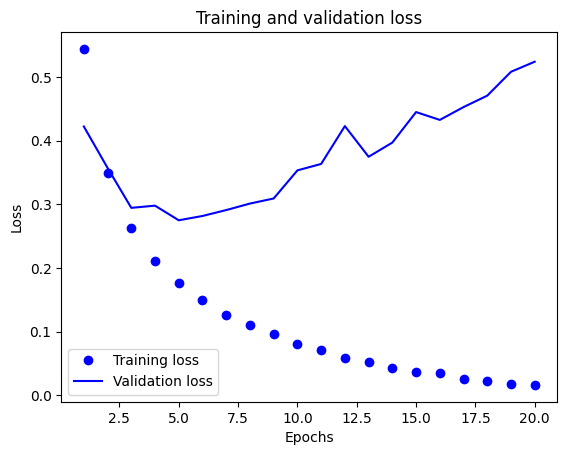

In [76]:
training_loss = history['loss']
val_loss = history['val_loss']
epochs = range(1,len(training_loss)+1)
plt.plot(range(1,21), training_loss, "bo", label="Training loss")
plt.plot(range(1,21), val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss")
plt.plot()

In [77]:
epochs

range(1, 21)

[]

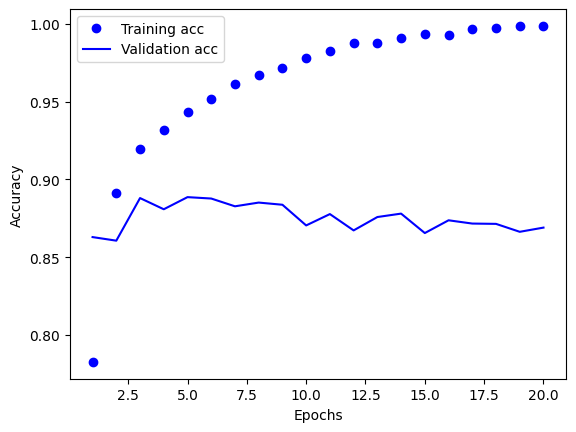

In [78]:
training_acc = history['accuracy']
val_acc = history['val_accuracy']
plt.plot(epochs, training_acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot()

Overfitting (переобучивается)

## Model with 5 layers

In [79]:
  model = keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(16,activation="relu"),
      layers.Dense(1, "sigmoid")
  ])
  model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=["accuracy"])
  history = model.fit(x=partial_x_train, y=partial_y_train, epochs=5, batch_size=512, validation_data=(x_val, y_val))
  results = model.evaluate(x_test,y_test)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.6957 - loss: 0.5965 - val_accuracy: 0.8233 - val_loss: 0.4287
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8839 - loss: 0.3517 - val_accuracy: 0.8823 - val_loss: 0.3162
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9217 - loss: 0.2482 - val_accuracy: 0.8855 - val_loss: 0.2905
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9338 - loss: 0.2010 - val_accuracy: 0.8859 - val_loss: 0.2854
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9434 - loss: 0.1697 - val_accuracy: 0.8893 - val_loss: 0.2765
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8805 - loss: 0.2928


In [80]:
results

[0.2909930348396301, 0.8830000162124634]

In [81]:
history = history.history

[]

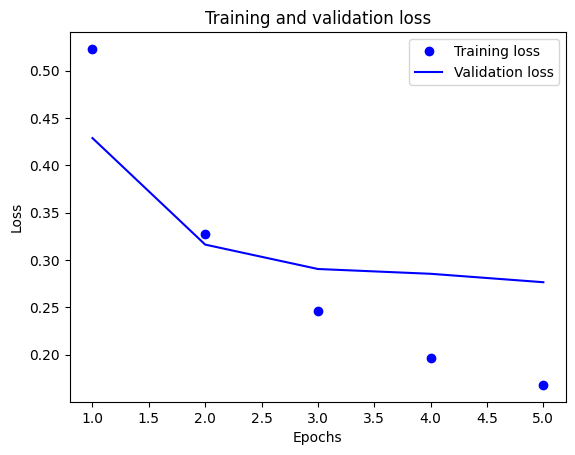

In [82]:
training_loss = history['loss']
val_loss = history['val_loss']
epochs = range(1,len(training_loss)+1)
plt.plot(range(1,len(training_loss)+1), training_loss, "bo", label="Training loss")
plt.plot(range(1,len(training_loss)+1), val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss")
plt.plot()

[]

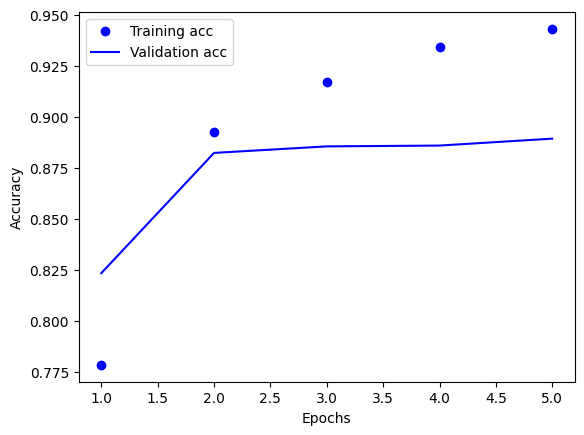

In [83]:
training_acc = history['accuracy']
val_acc = history['val_accuracy']
plt.plot(epochs, training_acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot()

## Where does it make errors? example

In [84]:
y_pred = model.predict(x_test)
# If your output is sigmoid (binary classification), convert to binary:
y_pred_binary = (y_pred > 0.5).astype(int)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [85]:
len(y_pred)

25000

In [86]:
# Identify misclassified samples
misclassified_indices = np.where(y_pred_binary.flatten() != y_test)[0]
misclassified_indices

array([    3,     8,    17, ..., 24966, 24985, 24999])

In [87]:
len(misclassified_indices)

2925

In [88]:
missclassified_samples = test_data[misclassified_indices]
missclassified_labels = y_test[misclassified_indices]
missclassified_preds = y_pred[misclassified_indices]


In [89]:
display(missclassified_labels[2], missclassified_preds[2]) # it was 0 but model predicted 1 (little over 0.5)

0.0

array([0.6654565], dtype=float32)

In [90]:
decoded_review = " ".join(
[reverse_word_index.get(i - 3, "?") for i in test_data[misclassified_indices[2]]]) # i -3 because... magic
decoded_review

"? ed ? mitchell is a teenager who lives for his job at good ? a small but friendly neighborhood ? stand while his buddy ? thompson also works there but lack ? single minded devotion to his job he's there because he accidentally destroyed the car of his teacher mr ? ? and has to raise money to pay the ? when ? ? a ? fast foot chain opens across the street it looks like good ? is history until ed ? a secret ? that brings hundreds of new customers to their door however the ? manager of ? ? kurt jan is determined to get his hands on the ? and put good ? out of business meanwhile ed and ? must rescue ? ? ? the world's oldest fast food employee from the demented hills asylum and ed might just find love with ? jackson if he could take his mind off the ? long enough to pay attention to her good ? is a comedy directed for kids decent story acting and overall a pretty harmless kids movie"

## Experiments

### 1 layers

In [91]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, "sigmoid")
])
model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(x=partial_x_train, y=partial_y_train, epochs=5, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test,y_test)
history = history.history


Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.6928 - loss: 0.5963 - val_accuracy: 0.8658 - val_loss: 0.4124
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8864 - loss: 0.3668 - val_accuracy: 0.8797 - val_loss: 0.3370
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9093 - loss: 0.2839 - val_accuracy: 0.8842 - val_loss: 0.3058
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9269 - loss: 0.2350 - val_accuracy: 0.8757 - val_loss: 0.3040
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9305 - loss: 0.2061 - val_accuracy: 0.8878 - val_loss: 0.2787
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8817 - loss: 0.2919


In [92]:
results

[0.29038405418395996, 0.884119987487793]

[]

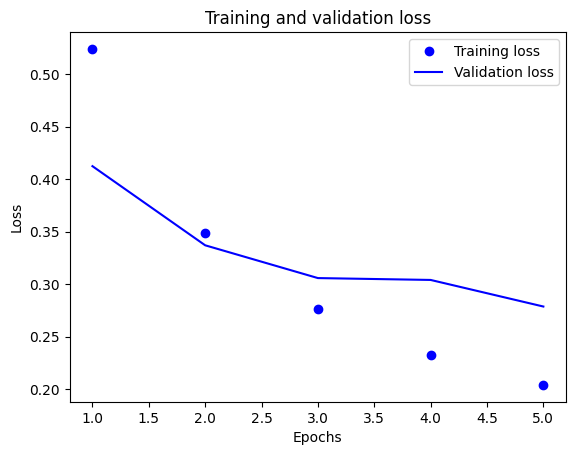

In [93]:

training_loss = history['loss']
val_loss = history['val_loss']
epochs = range(1,len(training_loss)+1)
plt.plot(range(1,len(training_loss)+1), training_loss, "bo", label="Training loss")
plt.plot(range(1,len(training_loss)+1), val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss")
plt.plot()

[]

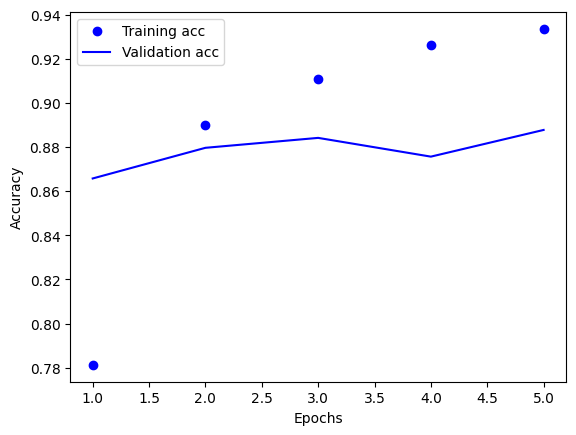

In [94]:
training_acc = history['accuracy']
val_acc = history['val_accuracy']
plt.plot(epochs, training_acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot()

### 1 layers 256 neurons

In [95]:
model = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dense(1, "sigmoid")
])
model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(x=partial_x_train, y=partial_y_train, epochs=5, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test,y_test)
history = history.history


Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.6848 - loss: 0.5992 - val_accuracy: 0.8716 - val_loss: 0.3467
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8866 - loss: 0.3155 - val_accuracy: 0.8216 - val_loss: 0.4071
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8983 - loss: 0.2661 - val_accuracy: 0.8857 - val_loss: 0.2827
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9185 - loss: 0.2142 - val_accuracy: 0.8861 - val_loss: 0.2814
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9298 - loss: 0.1843 - val_accuracy: 0.8819 - val_loss: 0.2856
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8753 - loss: 0.2970


In [96]:
results

[0.29793697595596313, 0.8765599727630615]

[]

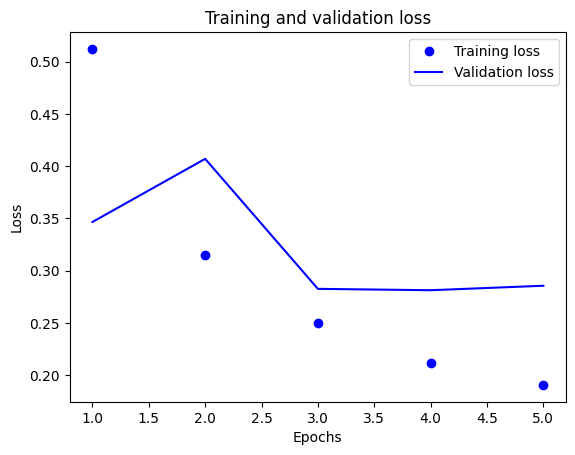

In [97]:

training_loss = history['loss']
val_loss = history['val_loss']
epochs = range(1,len(training_loss)+1)
plt.plot(range(1,len(training_loss)+1), training_loss, "bo", label="Training loss")
plt.plot(range(1,len(training_loss)+1), val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss")
plt.plot()

[]

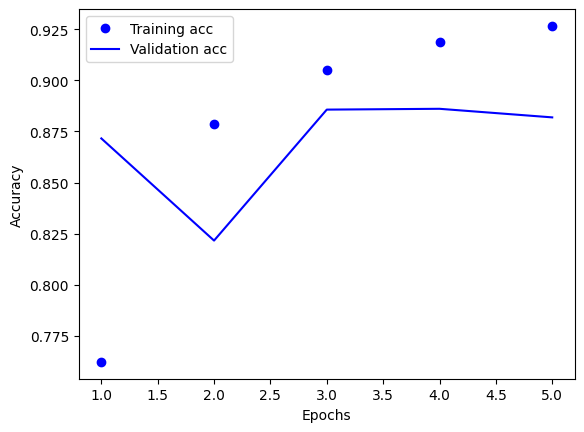

In [98]:
training_acc = history['accuracy']
val_acc = history['val_accuracy']
plt.plot(epochs, training_acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot()

### 4 layers

In [99]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, "sigmoid")
])
model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(x=partial_x_train, y=partial_y_train, epochs=6, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test,y_test)
history = history.history


Epoch 1/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.6516 - loss: 0.6251 - val_accuracy: 0.8447 - val_loss: 0.3990
Epoch 2/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8852 - loss: 0.3248 - val_accuracy: 0.8857 - val_loss: 0.2943
Epoch 3/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9246 - loss: 0.2247 - val_accuracy: 0.8880 - val_loss: 0.2810
Epoch 4/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9425 - loss: 0.1730 - val_accuracy: 0.8721 - val_loss: 0.3315
Epoch 5/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9468 - loss: 0.1504 - val_accuracy: 0.8657 - val_loss: 0.3767
Epoch 6/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9593 - loss: 0.1275 - val_accuracy: 0.8780 - val_loss: 0.3453
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8624 - loss: 0.3752


In [100]:
results

[0.3694519102573395, 0.8656799793243408]

[]

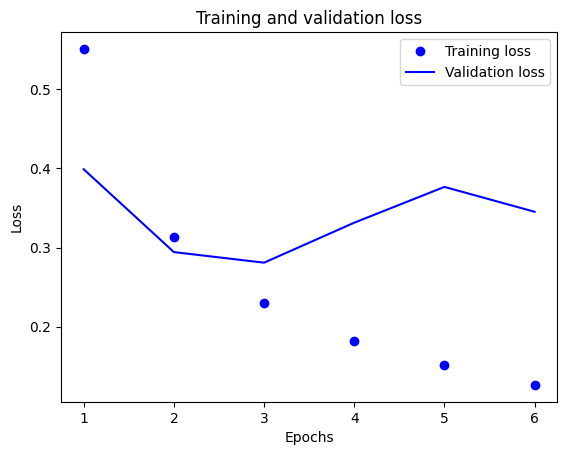

In [101]:

training_loss = history['loss']
val_loss = history['val_loss']
epochs = range(1,len(training_loss)+1)
plt.plot(range(1,len(training_loss)+1), training_loss, "bo", label="Training loss")
plt.plot(range(1,len(training_loss)+1), val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss")
plt.plot()

[]

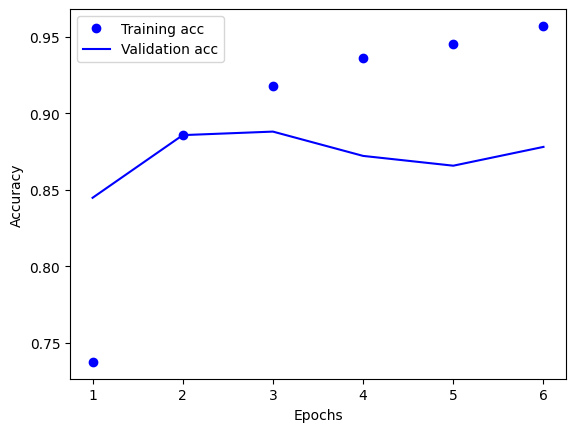

In [102]:
training_acc = history['accuracy']
val_acc = history['val_accuracy']
plt.plot(epochs, training_acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot()

### Different loss function : MSE

In [103]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(1, "sigmoid")
])
model.compile(optimizer='rmsprop', loss="mse", metrics=["accuracy"])
history = model.fit(x=partial_x_train, y=partial_y_train, epochs=6, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test,y_test)
history = history.history

Epoch 1/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.6829 - loss: 0.2144 - val_accuracy: 0.8590 - val_loss: 0.1317
Epoch 2/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8863 - loss: 0.1131 - val_accuracy: 0.8782 - val_loss: 0.1024
Epoch 3/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9124 - loss: 0.0821 - val_accuracy: 0.8863 - val_loss: 0.0918
Epoch 4/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9279 - loss: 0.0664 - val_accuracy: 0.8796 - val_loss: 0.0919
Epoch 5/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9407 - loss: 0.0562 - val_accuracy: 0.8744 - val_loss: 0.0932
Epoch 6/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9480 - loss: 0.0483 - val_accuracy: 0.8811 - val_loss: 0.0872
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8730 - loss: 0.0928


In [104]:
results

[0.09245160222053528, 0.8742799758911133]

[]

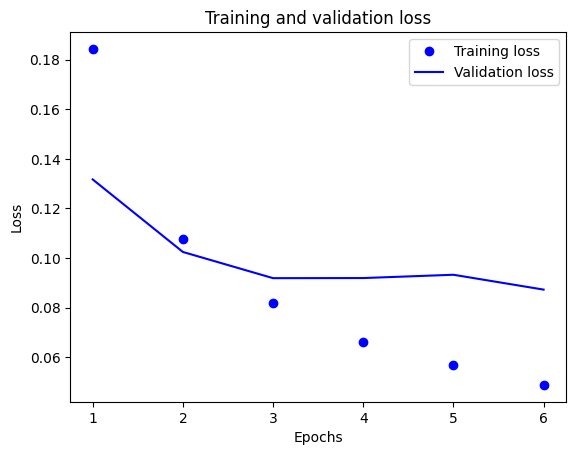

In [105]:

training_loss = history['loss']
val_loss = history['val_loss']
epochs = range(1,len(training_loss)+1)
plt.plot(range(1,len(training_loss)+1), training_loss, "bo", label="Training loss")
plt.plot(range(1,len(training_loss)+1), val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss")
plt.plot()

[]

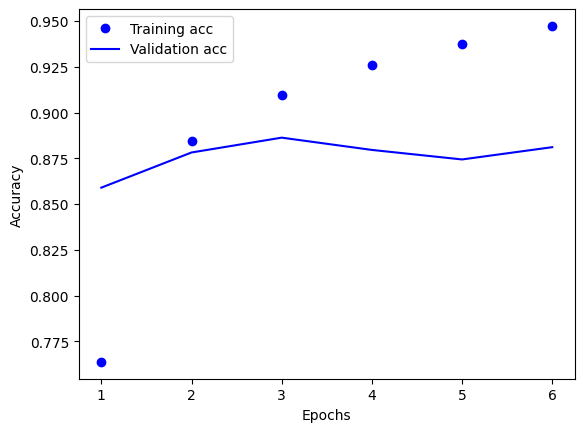

In [106]:
training_acc = history['accuracy']
val_acc = history['val_accuracy']
plt.plot(epochs, training_acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot()

### Different activation function: tanh

In [107]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16,activation="tanh"),
    layers.Dense(1, "sigmoid")
])
model.compile(optimizer='rmsprop', loss="mse", metrics=["accuracy"])
history = model.fit(x=partial_x_train, y=partial_y_train, epochs=6, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test,y_test)
history = history.history

Epoch 1/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.6926 - loss: 0.2011 - val_accuracy: 0.8542 - val_loss: 0.1205
Epoch 2/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8891 - loss: 0.0985 - val_accuracy: 0.8773 - val_loss: 0.0942
Epoch 3/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9168 - loss: 0.0699 - val_accuracy: 0.8756 - val_loss: 0.0915
Epoch 4/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9396 - loss: 0.0531 - val_accuracy: 0.8864 - val_loss: 0.0820
Epoch 5/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9516 - loss: 0.0430 - val_accuracy: 0.8843 - val_loss: 0.0833
Epoch 6/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9598 - loss: 0.0352 - val_accuracy: 0.8826 - val_loss: 0.0860
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8743 - loss: 0.0925


In [108]:
results

[0.09115951508283615, 0.8768399953842163]

[]

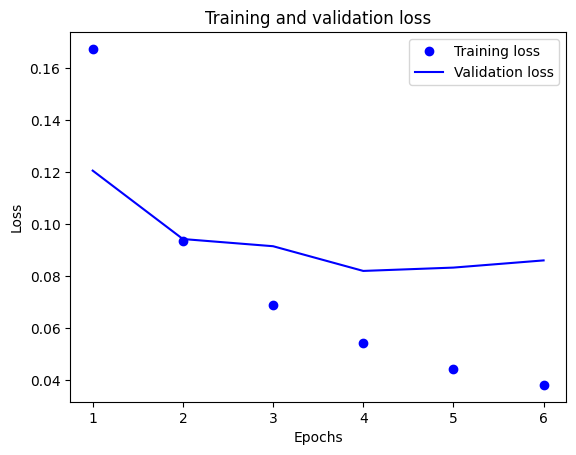

In [109]:

training_loss = history['loss']
val_loss = history['val_loss']
epochs = range(1,len(training_loss)+1)
plt.plot(range(1,len(training_loss)+1), training_loss, "bo", label="Training loss")
plt.plot(range(1,len(training_loss)+1), val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss")
plt.plot()

[]

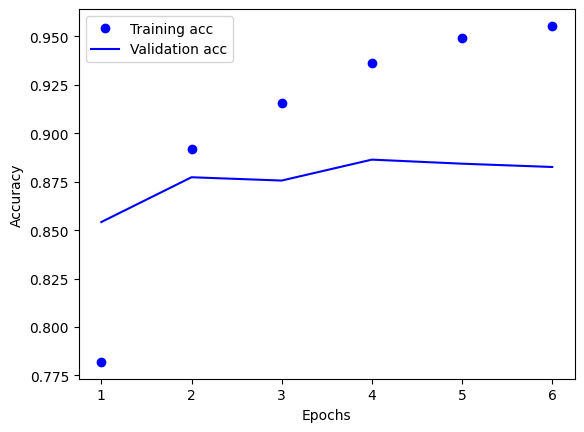

In [110]:
training_acc = history['accuracy']
val_acc = history['val_accuracy']
plt.plot(epochs, training_acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot()

### Where does model make misstakes?